<p>Introduction into <b>Classification</b></p>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
X1 = np.array([0., 1, 2, 3, 4, 5])
Y1 = np.array([0,  0, 0, 1, 1, 1])
X2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
Y2 = np.array([0, 0, 0, 1, 1, 1])
print(X1.shape)
print(Y1.shape)
print(X2.shape)
print(Y2.shape)
print(X2)
print(Y2)

(6,)
(6,)
(6, 2)
(6,)
[[0.5 1.5]
 [1.  1. ]
 [1.5 0.5]
 [3.  0.5]
 [2.  2. ]
 [1.  2.5]]
[0 0 0 1 1 1]


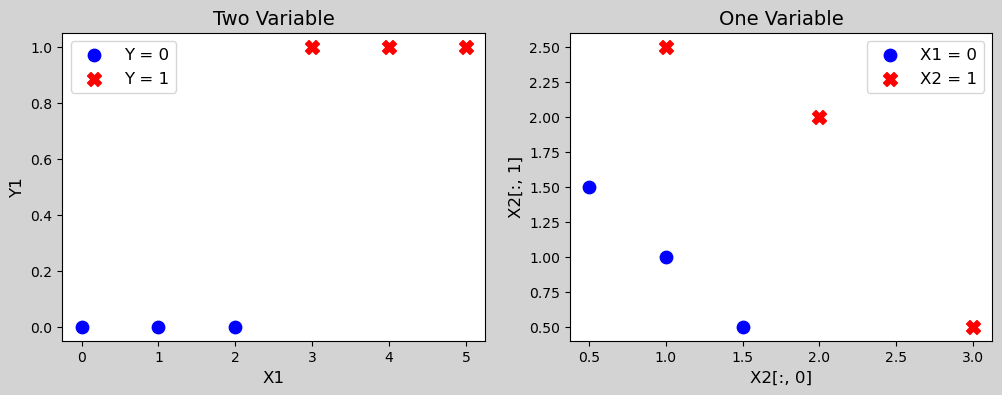

In [46]:
fig = plt.figure(figsize=(12, 4))
fig.set_facecolor('lightgray')

plt.subplot(1, 2, 1)
plt.scatter(X1[:3], Y1[:3], label="Y = 0", marker="o",s=80, color="blue")
plt.scatter(X1[3:], Y1[3:], label="Y = 1", marker="X",s=100, color="red")
plt.ylabel("Y1", fontsize=12)
plt.xlabel("X1", fontsize=12)
plt.title("Two Variable", fontsize=14)
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.scatter(X2[:3, 0], X2[:3, 1], label="X1 = 0", marker="o",s=80, color="blue")
plt.scatter(X2[3:, 0], X2[3:, 1], label="X2 = 1", marker="X",s=100, color="red")
plt.xlabel("X2[:, 0]", fontsize=12)
plt.ylabel("X2[:, 1]", fontsize=12)
plt.title("One Variable", fontsize=14)
plt.legend(fontsize=12)
plt.show()

<p>A <b>Linear Regression</b> Molde to Predict the Best Line!</p>

In [47]:
class SingleRegressionPerceptron(object):

    def __init__(self, learning_rate=1e-2, max_iter=50):

        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.params = {}
        self.cost = []

    def layer_size(self, X, Y):

        input_layer = X.shape[0]
        output_layer = Y.shape[0]

        return input_layer, output_layer

    def param_init(self, input_layer, output_layer):

        params = {}
        W = np.random.randn(output_layer, input_layer)
        b = np.zeros((output_layer, 1))

        params["W"] = W * 0.01
        params["b"] = b

        return params

    def forward_propagation(self, X, params):

        W = params["W"]
        b = params["b"]

        y_hat = W @ X + b

        return y_hat

    def compute_cost(self, Y, y_hat):

        m = Y.shape[1]

        cost = np.sum(np.power(y_hat - Y, 2)) / (2 * m)

        return cost

    def backward_propagation(self, y_hat, X, Y):

        grads = {}
        m = X.shape[1]

        dZ = y_hat - Y
        dW = 1 / m * np.matmul(dZ, X.T)
        db = 1 / m * np.sum(dZ, axis=1, keepdims=True)

        grads["dW"] = dW
        grads["db"] = db

        return grads

    def param_update(self, grads):

        params = {}

        W = self.params["W"]
        b = self.params["b"]

        dW = grads["dW"]
        db = grads["db"]

        W = W - self.learning_rate * dW
        b = b - self.learning_rate * db

        params["W"] = W
        params["b"] = b

        return params



    def train(self, X, Y):

        input_layer, output_layer = self.layer_size(X=X, Y=Y)
        self.params = self.param_init(
            input_layer=input_layer,
            output_layer=output_layer
        )

        for i in range(self.max_iter):

            y_hat = self.forward_propagation(
                X=X,
                params=self.params
            )

            cost = self.compute_cost(
                Y=Y,
                y_hat=y_hat
            )

            grads = self.backward_propagation(
                y_hat=y_hat,
                X=X,
                Y=Y
            )

            params = self.param_update(
                grads=grads
            )

            self.params = params
            self.cost.append(cost)


In [52]:
model = SingleRegressionPerceptron(learning_rate=1e-2, max_iter=100)
model.train(X1.reshape((1, 6)), Y1.reshape((1, 6)))

In [53]:
print(model.cost)
print(model.params)

[0.2569437661851958, 0.21524681894347522, 0.18136867984074265, 0.15384195677863424, 0.13147465732719507, 0.11329850176184371, 0.09852693670104491, 0.08652102873754615, 0.07676175914728342, 0.06882751832275145, 0.062375824047408046, 0.05712847088132101, 0.05285946670766544, 0.049385233346181036, 0.04655664631387527, 0.044252568562119864, 0.04237459780089713, 0.040842799644359544, 0.03959224155892075, 0.03857017731939076, 0.03773375988591286, 0.0370481835277727, 0.036485174633097854, 0.036021765763136974, 0.03563929979182261, 0.03532262094824957, 0.0350594176841604, 0.03483968887194575, 0.03465531018650878, 0.03449968186850277, 0.03436744259529898, 0.034254237052597024, 0.034156527128150094, 0.03407143854061359, 0.03399663625305919, 0.03393022326885299, 0.0338706584214998, 0.03381668959366877, 0.03376729946965461, 0.033721661469000956, 0.03367910395048739, 0.03363908113429937, 0.03360114948151386, 0.03356494850667257, 0.03353018519144158, 0.03349662132350615, 0.03346406321169311, 0.03343

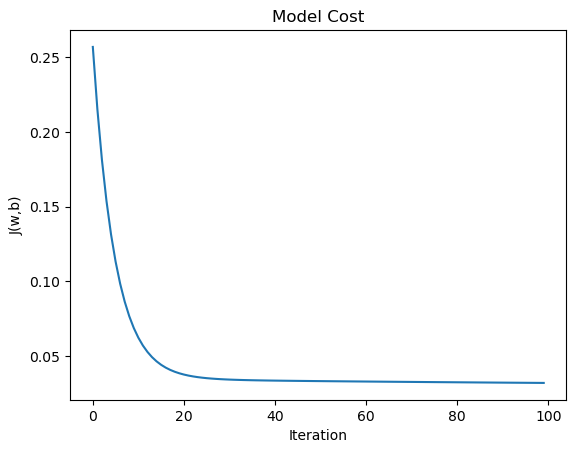

In [57]:
plt.plot(model.cost)
plt.title("Model Cost")
plt.ylabel("J(w,b)")
plt.xlabel("Iteration")
plt.show()

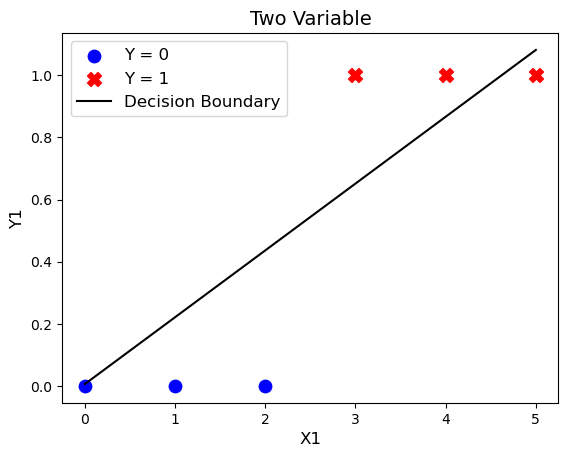

In [64]:
plt.scatter(X1[:3], Y1[:3], label="Y = 0", marker="o",s=80, color="blue")
plt.scatter(X1[3:], Y1[3:], label="Y = 1", marker="X",s=100, color="red")
plt.plot(range(6), [i*0.21513169+0.00619459 for i in range(6)], color="black", label="Decision Boundary")
plt.ylabel("Y1", fontsize=12)
plt.xlabel("X1", fontsize=12)
plt.title("Two Variable", fontsize=14)
plt.legend(fontsize=12)
plt.show()